In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("insurance.csv")

In [170]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [171]:
dataset.shape

(1338, 7)

In [172]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [173]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [174]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

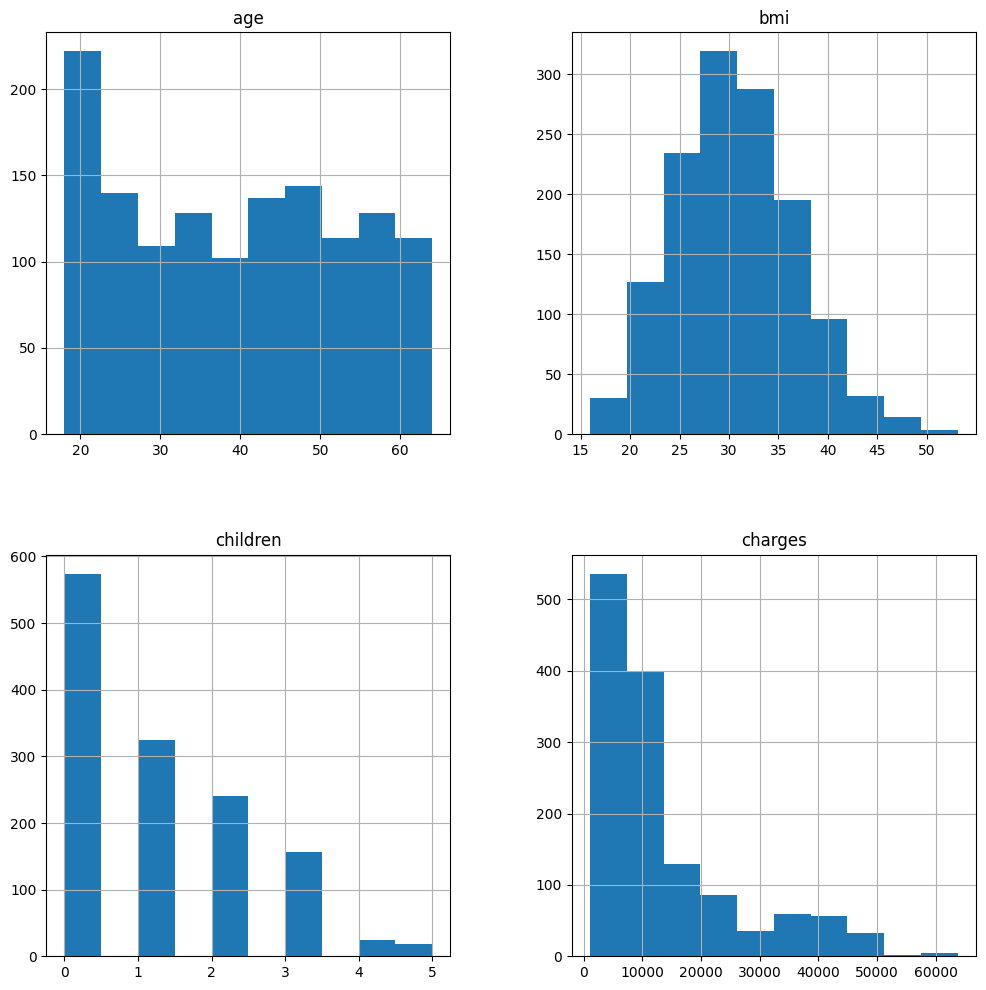

In [175]:
dataset.hist(figsize=(12,12))

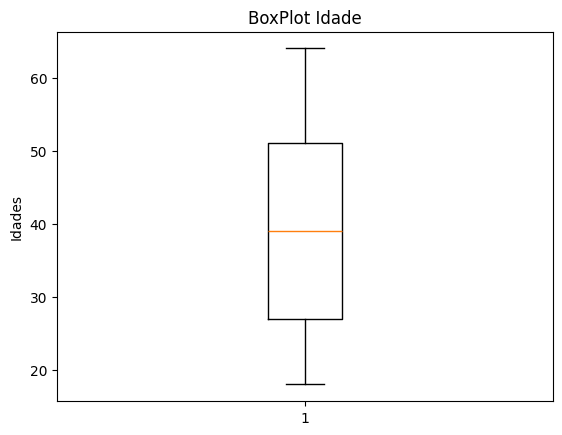

18
64


In [176]:
plt.boxplot(dataset['age'])
plt.title('BoxPlot Idade')
plt.ylabel('Idades')
plt.show()

print(dataset['age'].min())
print(dataset['age'].max())

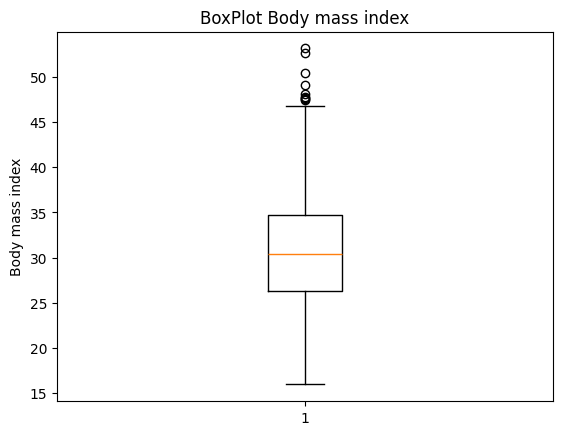

15.96
53.13


In [177]:
plt.boxplot(dataset['bmi'])
plt.title('BoxPlot Body mass index')
plt.ylabel('Body mass index')
plt.show()

print(dataset['bmi'].min())
print(dataset['bmi'].max())

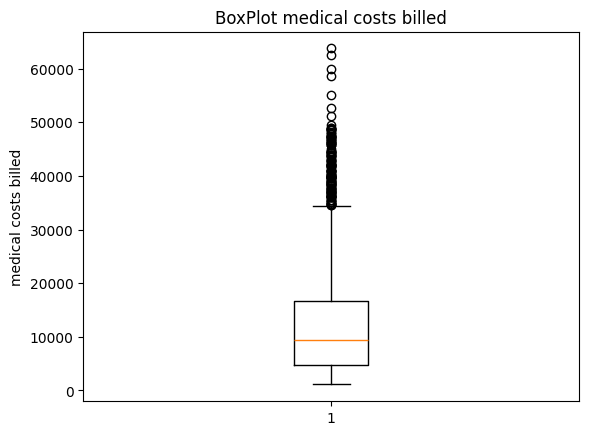

1121.8739
63770.42801


In [178]:
plt.boxplot(dataset['charges'])
plt.title('BoxPlot medical costs billed')
plt.ylabel('medical costs billed')
plt.show()

print(dataset['charges'].min())
print(dataset['charges'].max())

In [199]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dataset['sex'] =  label_encoder.fit_transform(dataset['sex'])
dataset['smoker'] =  label_encoder.fit_transform(dataset['smoker'])
dataset['region'] =  label_encoder.fit_transform(dataset['region'])
dataset.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


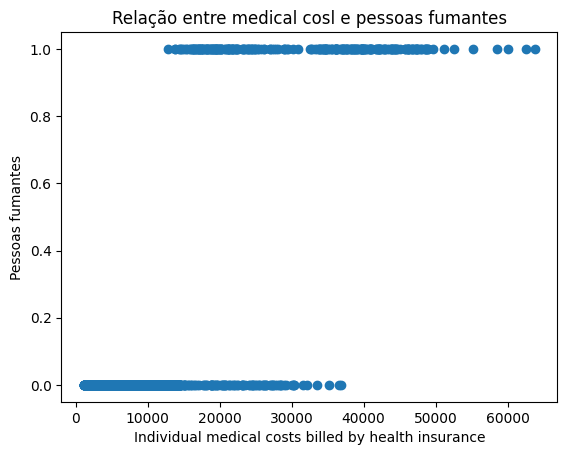

In [200]:
plt.scatter(dataset['charges'], dataset['smoker'])
plt.xlabel('Individual medical costs billed by health insurance')
plt.ylabel('Pessoas fumantes')
plt.title('Relação entre medical cosl e pessoas fumantes')
plt.show()

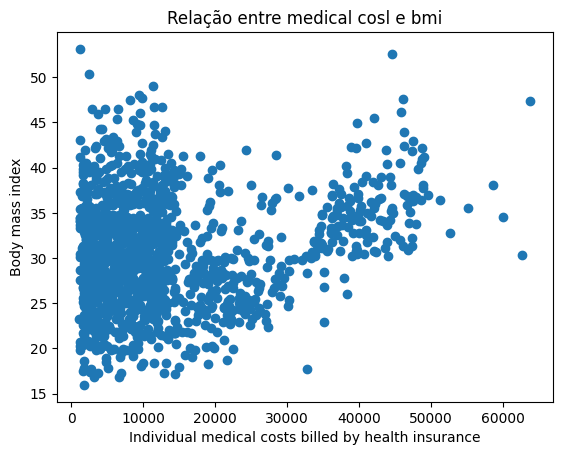

In [201]:
plt.scatter(dataset['charges'], dataset['bmi'])
plt.xlabel('Individual medical costs billed by health insurance')
plt.ylabel('Body mass index')
plt.title('Relação entre medical cosl e bmi')
plt.show()

In [203]:
dataset.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


1070 treinamento + 268 teste


In [242]:
from sklearn.linear_model import LinearRegression

X = dataset.drop(columns=['smoker'])
y = dataset['smoker']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print(len(X_train), "treinamento +", len(X_test), "teste")

# Dividindo os dados em conjuntos de treinamento e teste
c = dataset[['charges']]  # Recurso (variável independente)
s = dataset['smoker']  # Rótulo (variável dependente)

c_train, c_test, s_train, s_test = train_test_split(c, s, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(c_train, s_train)

# Fazendo previsões no conjunto de teste
previsoes = modelo.predict(c_test)

1070 treinamento + 268 teste


Erro Médio Quadrático: 0.053841629103752384
Erro Absoluto Médio: 0.15376924705795875
R² (coeficiente de determinação): 0.6653581543139571


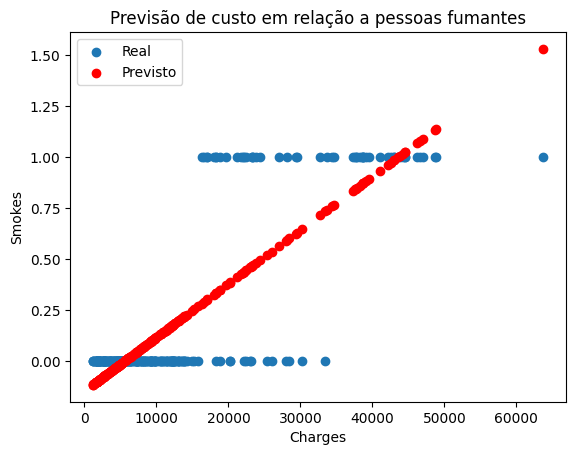

In [244]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

erro_medio_quadratico = mean_squared_error(s_test, previsoes)
erro_absoluto_medio = mean_absolute_error(s_test, previsoes)
r_quadrado = r2_score(s_test, previsoes)

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')

# Visualizando as previsões
plt.scatter(c_test, s_test, label='Real')
plt.scatter(c_test, previsoes, label='Previsto', color='red')
plt.xlabel('Charges')
plt.ylabel('Smokes')
plt.title('Previsão de custo em relação a pessoas fumantes')
plt.legend()
plt.show()

In [228]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler() #chamando o metodo de normalização dos dados (0-1)

scaler.fit(X_train)

x_train_min_max_scaled = scaler.transform(X_train)
x_test_min_max_scaled= scaler.transform(X_test)

In [229]:
x_train_min_max_scaled

array([[0.15217391, 1.        , 0.29163304, 0.6       , 1.        ,
        0.04444242],
       [0.5       , 0.        , 0.46260425, 0.6       , 0.        ,
        0.11838126],
       [0.        , 0.        , 0.56201238, 0.        , 0.66666667,
        0.00810808],
       ...,
       [0.30434783, 1.        , 0.57506053, 0.2       , 0.        ,
        0.05659722],
       [0.58695652, 0.        , 0.34005919, 0.4       , 0.66666667,
        0.11803872],
       [0.04347826, 0.        , 0.42937853, 0.        , 0.33333333,
        0.01819188]])

In [230]:
scaler = StandardScaler() #chamando o metodo de padronização dos dados (média e std)

scaler.fit(X_train)# qual média e std será utilizado para o escalonamento

x_train_standard_scaled = scaler.transform(X_train)
x_test_standard_scaled  = scaler.transform(X_test)

In [231]:
x_train_standard_scaled

array([[-1.00715695,  0.98331672, -0.656649  ,  1.56520739,  1.35124636,
        -0.77543088],
       [ 0.1331464 , -1.01696634,  0.3949374 ,  1.56520739, -1.36478421,
        -0.39245542],
       [-1.50603966, -1.01696634,  1.00636332, -0.91471153,  0.44590284,
        -0.9636291 ],
       ...,
       [-0.50827423,  0.98331672,  1.08661814, -0.08807189, -1.36478421,
        -0.71247358],
       [ 0.41822224, -1.01696634, -0.35879605,  0.73856775,  0.44590284,
        -0.39422964],
       [-1.36350174, -1.01696634,  0.19057718, -0.91471153, -0.45944069,
        -0.91139882]])

In [232]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [233]:
from sklearn.metrics import accuracy_score

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.92


In [234]:
model_min_max = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo
model_min_max.fit(x_train_min_max_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_min_max = model.predict(x_test_min_max_scaled)

accuracy_min_max = accuracy_score(y_test, y_pred_min_max)
print(f'Acurácia: {accuracy_min_max:.2f}')

Acurácia: 0.79


/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [235]:
model_standard = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo
model_standard.fit(x_train_standard_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_standard = model.predict(x_test_standard_scaled)

accuracy_strandard = accuracy_score(y_test, y_pred_standard)
print(f'Acurácia: {accuracy_strandard:.2f}')

Acurácia: 0.79


/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [51]:
dum_region = pd.get_dummies(dataset, columns=['region'])
dum_region

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,False,True,False,False
1334,18,0,31.920,0,0,2205.98080,True,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,False,False,True


In [54]:
set(dataset['region'])

{'northeast', 'northwest', 'southeast', 'southwest'}

In [55]:
dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [158]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataset, test_size=0.2, random_state=42)

print(len(df_train), "treinamento +", len(df_test), "teste")

1070 treinamento + 268 teste


<Axes: >

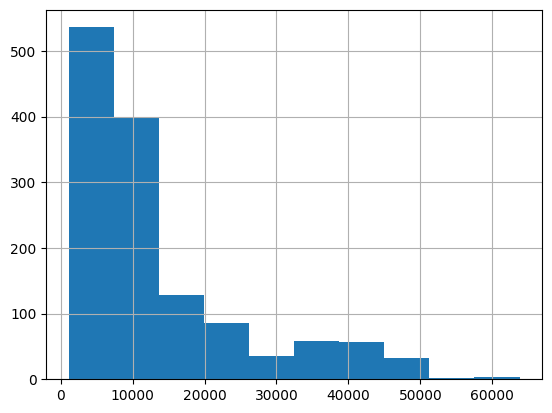

In [161]:
dataset['charges'].hist()

<Axes: >

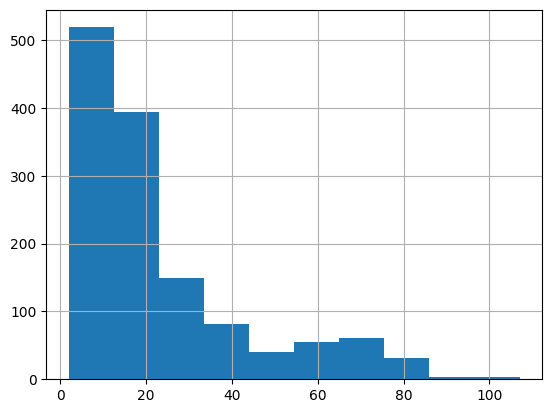

In [168]:


dataset['charges_cat'] = np.ceil(dataset['charges'] / 600)


dataset['charges_cat'].hist()

/var/folders/dt/37ssc6ts6m94_gkykllxc_840000gp/T/ipykernel_3848/3386253256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['charges_cat'].where(dataset['charges_cat'] < 10, 10.0, inplace=True)


<Axes: >

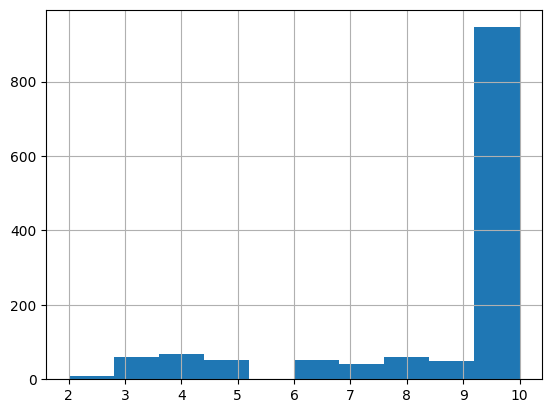

In [167]:
dataset['charges_cat'].where(dataset['charges_cat'] < 10, 10.0, inplace=True)
dataset['charges_cat'].hist()

In [153]:
dataset['charges_cat'] = pd.cut(dataset['charges'], bins=[0., 1.0, 2.0, 3.0, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [155]:
dataset["charges_cat"].value_counts()

charges_cat
5    1338
1       0
2       0
3       0
4       0
Name: count, dtype: int64

In [149]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["charges_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [140]:
strat_test_set["charges_cat"].value_counts() / len(strat_test_set)

charges_cat
5    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: count, dtype: float64

,age,sex,bmi,children,smoker,region,charges,charges_cat
0,19,0,27.900,0,1,southwest,16884.92400,5
1,18,1,33.770,1,0,southeast,1725.55230,5
2,28,1,33.000,3,0,southeast,4449.46200,5
3,33,1,22.705,0,0,northwest,21984.47061,5
4,32,1,28.880,0,0,northwest,3866.85520,5
5,31,0,25.740,0,0,southeast,3756.62160,5
6,46,0,33.440,1,0,southeast,8240.58960,5
7,37,0,27.740,3,0,northwest,7281.50560,5
8,37,1,29.830,2,0,northeast,6406.41070,5
9,60,0,25.840,0,0,northwest,28923.13692,5
